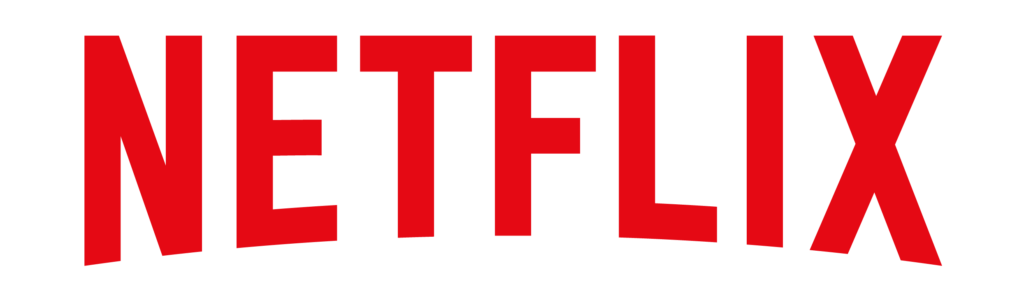

# Netflix Analysis

Problem Statement : Explore out the briefer analysis on Netflix Dataset with an access to noticeable feature attributes for Movies/TV Shows with Viewership Score and present the justifiable insights in points along with an overall summary.

Dataset:'netflix daily top 10.csv'.
(Netflix Top 10 Shows for the period 2020-2022)

In [44]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [46]:
#Loading the dataset
df = pd.read_csv('netflix daily top 10.csv')
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


### 📊Data Overview

The dataset comprises the following columns:

- As of: Date of ranking.
- Rank: Current rank on that date.
- Year to Date Rank: Cumulative rank for the year.
- Last Week Rank: Rank from the previous week.
- Title: Name of the movie or TV show.
- Type: Whether it's a TV Show or Movie.
- Netflix Exclusive: Indicates if it's exclusive to Netflix.
- Netflix Release Date: Release date on Netflix.
- Days In Top 10: Number of days the title remained in the Top 10.
- Viewership Score: A metric quantifying popularity.

In [48]:
# Size or the shape of dataset
df.shape

(7100, 10)

### Pre process cleaning and orgainzing data

In [50]:
# checking if there is any missing or null value
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [52]:
# check if there is any duplicate values
df[df.duplicated(keep=False)]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score


In [54]:
# Remove any blank space in the column variable 
df.columns = df.columns.str.strip()
df.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

In [56]:
# converting the 'as of' and 'netflix release date' to datetime format
df['As of']= pd.to_datetime(df['As of'])
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'], errors = 'coerce')

In [58]:
# Filling the missing values in the 'netflix exclusive'
df['Netflix Exclusive'] = df['Netflix Exclusive'].fillna('No')
df['Netflix Exclusive'].head()

0    Yes
1    Yes
2     No
3     No
4    Yes
Name: Netflix Exclusive, dtype: object

In [60]:
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,2018-09-14,4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,2020-03-26,2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,2020-02-13,9,40
8,2020-04-01,9,8,-,Badland,Movie,No,2020-03-26,4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,2020-03-27,4,15


### Considering the use cases that align well with the data at hand. Potential use cases could include:

- Trends in Viewership Scores: How do viewership scores change over time?
        
- Effectiveness of Netflix Exclusives: Do Netflix exclusives perform better than non-exclusives?
        
- TV Shows vs Movies: Which type tends to perform better in the top 10?
        
- Popular Titles: Which titles consistently appear in the Top 10 with high viewership?

In [62]:
# Describe the stats for all numberical columns
df.describe()

,As of,Rank,Netflix Release Date,Days In Top 10,Viewership Score
count,7100,7100.000000,7100,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,2020-06-21 08:05:32.619718144,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,2007-01-15 00:00:00,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,2020-04-26 00:00:00,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,2020-10-02 00:00:00,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,2021-05-14 00:00:00,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,2022-03-04 00:00:00,428.000000,1474.000000
std,NaN,2.872484,NaN,58.473789,213.861642


In [64]:
# Groupby 'title' aggregation on 'viewership score' and 'days in top 10'

title_st = df.groupby('Title').agg({
    'Viewership Score' : 'max',
    'Days In Top 10' : 'max'
}).sort_values('Viewership Score', ascending = False)

# Top 10 by viewership score
top_10 = title_st.head(10).reset_index()
top_10

,Title,Viewership Score,Days In Top 10
0,Cocomelon,1474,428
1,Manifest,590,80
2,Cobra Kai,582,81
3,Ozark,536,89
4,Outer Banks,534,72
5,Squid Game,495,66
6,The Queenâs Gambit,446,73
7,Bridgerton,432,58
8,All American,416,66
9,Lucifer,415,57


In [66]:
print(df['Type'].value_counts(),'\n')
print(df['Title'].value_counts())

Type
TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: count, dtype: int64 

Title
Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: count, Length: 645, dtype: int64


Above we can see the frequency of tv shows are majority in netflix than the Movies 
" Tv show > Movie > Stand-Up Comedy > Concert/perf "

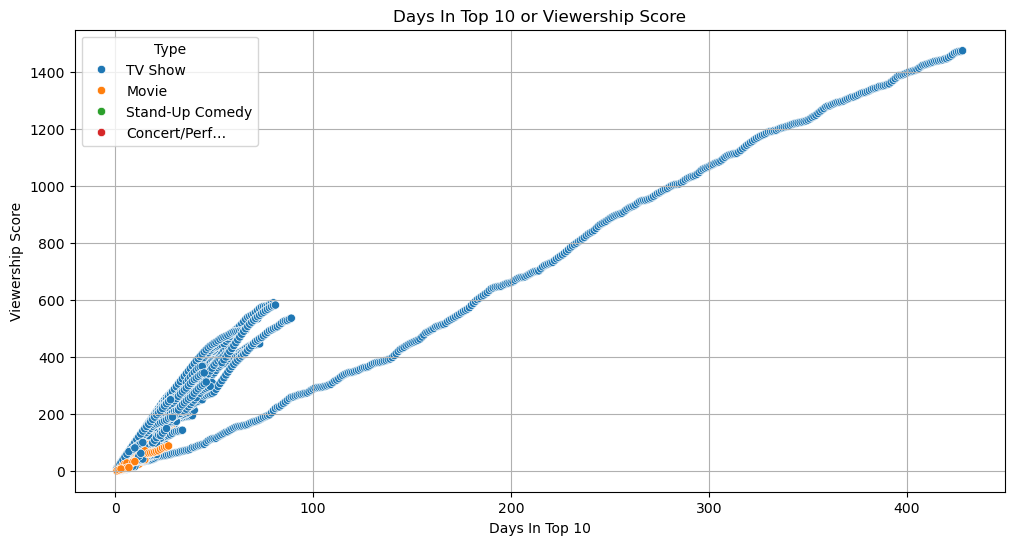

In [70]:
# Scatter plot of days in Top 10 vs viwership score

plt.figure(figsize = (12, 6))
sns.scatterplot(data = df, x = 'Days In Top 10', y = 'Viewership Score', hue = 'Type')
plt.title('Days In Top 10 or Viewership Score')
plt.xlabel('Days In Top 10')
plt.ylabel('Viewership Score')
plt.legend(title = 'Type')
plt.grid(True)
plt.show()

- The tv show viewership score dominant in netflix
- Comparing to movie or other genre the Tv show majority of Top 10 Days

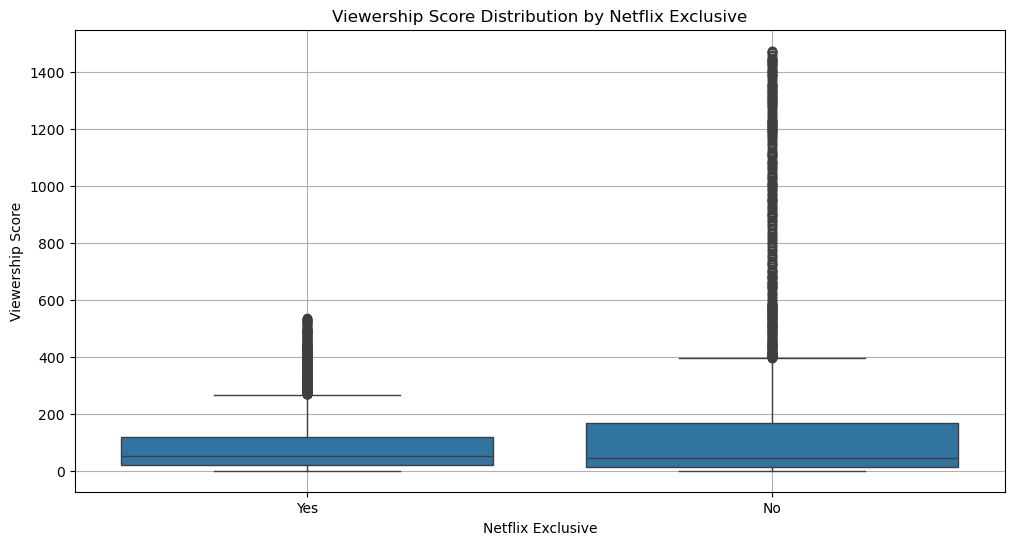

In [72]:
# Netflix Exclusive vs Viewership Score

plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'Netflix Exclusive', y = 'Viewership Score')
plt.title('Viewership Score Distribution by Netflix Exclusive')
plt.xlabel('Netflix Exclusive')
plt.ylabel('Viewership Score')
plt.grid(True)
plt.show()

- Above boxplot the average viewership in the non-netflix exclusive has a higher than netflix exclusive
- And the outlier and extreme are also the higher viewership score in non-netflix exclusive

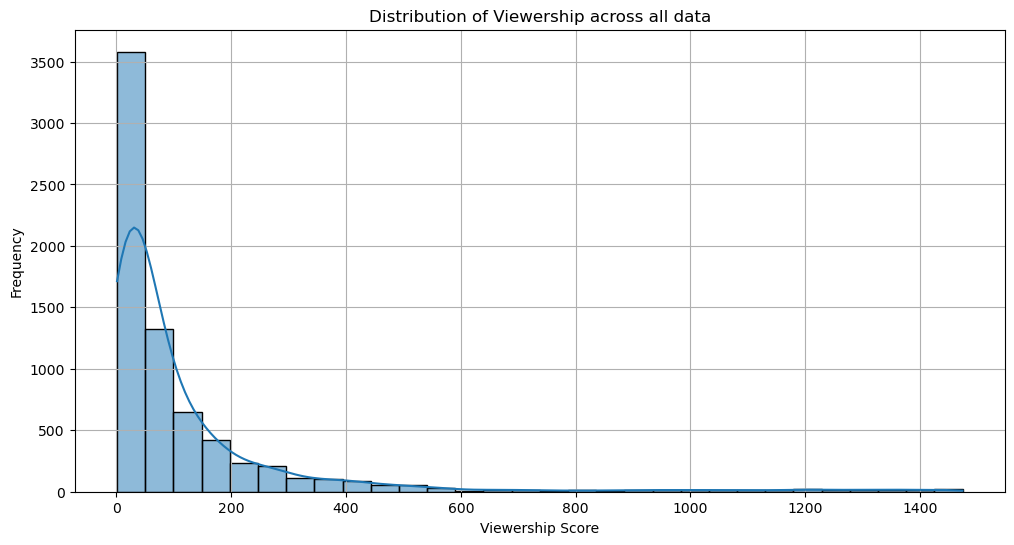

In [74]:
# Distribution of Viewership Score across all data

plt.figure(figsize = (12,6))
sns.histplot(df['Viewership Score'], bins=30, kde=True)
plt.title('Distribution of Viewership across all data')
plt.xlabel('Viewership Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 📊Key Insights:
Cocomelon as an Outlier

- Cocomelon stands out with unusually high longevity and viewership scores.

- This is likely due to frequent, repeated viewership by younger audiences.

Squid Game vs. Sustained Hits

- Although Squid Game was a viral sensation, it spent fewer days in the Top 10 compared to shows like Cobra Kai or Ozark.

- This highlights how quick spikes in popularity can differ from long-term performance.

Correlation Between Viewership Score and Days in Top 10

- Generally, shows with more days in the Top 10 tend to have higher viewership scores.

- However, viral outliers like Squid Game may skew this trend.

Netflix Exclusive vs. Non-Exclusive Content

- Netflix Originals show steady viewership, but Non-Netflix titles sometimes have even higher scores.

- This could be influenced by strong external fanbases or outliers like Cocomelon.

Impact of Duration and Branding

- Shows with longer availability and catchy or recognizable titles tend to perform better in terms of viewership.

- Duration on the platform may directly influence cumulative viewership scores.


### Conclusion:
- The analysis of Netflix content performance reveals nuanced dynamics between virality, longevity, and content origin. Outliers like Cocomelon underscore the impact of repeat viewership and niche audiences, while Squid Game illustrates how viral phenomena can achieve massive short-term success without sustained chart presence. A general correlation exists between viewership scores and time spent in the Top 10, but exceptions highlight the complexity of audience behavior. Interestingly, Non-Netflix titles can outperform Originals, suggesting external fanbases and brand recognition play a crucial role. Overall, duration on the platform and effective branding emerge as key drivers of long-term engagement and viewership.

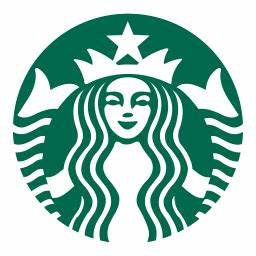

### Starbucks Analysis

Problem Statement : Do an exploratory data analysis for the Starbuck Dataset with feature attributes that focuses on Food Menu and Drinks Menu considering the Nutrition Facts along. Wrap the analysis by subjecting favorable points with a final conclusion that ejects from the complete understanding.

In [81]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#### Loading dataset

In [83]:
sb_drink = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
sb_drink.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [85]:
sb_drink.shape

(177, 7)

In [87]:
sb_food = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding='utf-16')
sb_food.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [89]:
sb_food.shape

(113, 6)

### 📊 Data Overview

This dataset provides nutritional information for various menu items. The key columns include:

- Items: The name or description of the menu item.

- Calories: Total caloric content per item.

- Fat (g): Total fat content, measured in grams.

- Carb. (g): Carbohydrates content in grams.

- Fiber (g): Dietary fiber content in grams.

- Protein (g): Protein content in grams.

- Sodium: Sodium content, typically measured in milligrams.

In [91]:
# Rename the unnamed column
sb_drink.rename(columns = {'Unnamed: 0':'Items'}, inplace = True)
sb_food.rename(columns = {'Unnamed: 0':'Items'}, inplace = True)
sb_drink.rename(columns = {'Protein':'Protein (g)'}, inplace = True)

In [93]:
# Replace the '-' with NaN 
sb_drink.replace('-', pd.NA, inplace = True)
sb_food.replace('-', pd.NA, inplace = True)

# Adding missing sodium column to sb_food(fill with NaN)
if 'Sodium' not in sb_food.columns:
    sb_food['Sodium'] = pd.NA
    
# Adding new column 'category'
sb_drink['Category'] = 'Drink'
sb_food['Category'] = 'Food'

In [95]:
# Strip down the extra spaces in columns name
sb_food.columns = sb_food.columns.str.strip()
sb_drink.columns = sb_drink.columns.str.strip()

In [99]:
# Print the columns name
print(sb_food.columns)
print(sb_drink.columns)

Index(['Items', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)',
       'Sodium', 'Category'],
      dtype='object')
Index(['Items', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)',
       'Sodium', 'Category'],
      dtype='object')


In [101]:
# Combine the two menu into one
sb_combine = pd.concat([sb_drink, sb_food], ignore_index = True)
print(sb_combine.head())
print('\n',sb_combine.shape)

                                               Items Calories Fat (g)  \
0           Cool Lime Starbucks Refreshers™ Beverage       45       0   
1                                   Ombré Pink Drink     <NA>    <NA>   
2                                         Pink Drink     <NA>    <NA>   
3     Strawberry Acai Starbucks Refreshers™ Beverage       80       0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...       60       0   

  Carb. (g) Fiber (g) Protein (g) Sodium Category  
0        11         0           0     10    Drink  
1      <NA>      <NA>        <NA>   <NA>    Drink  
2      <NA>      <NA>        <NA>   <NA>    Drink  
3        18         1           0     10    Drink  
4        14         1           0     10    Drink  

 (290, 8)


In [103]:
#checking if there is still any null values
sb_combine.isnull().sum()

Items            0
Calories        85
Fat (g)         85
Carb. (g)       85
Fiber (g)       85
Protein (g)     85
Sodium         198
Category         0
dtype: int64

In [105]:
# Droping the missing value
sb_combine.dropna(subset = ['Calories',	'Fat (g)',	'Carb. (g)',	'Fiber (g)',	'Protein (g)'], how = 'all', inplace = True)
sb_combine

,Items,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Sodium,Category
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10,Drink
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10,Drink
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10,Drink
8,Evolution Fresh™ Organic Ginger Limeade,110,0,28,0,0,5,Drink
9,Iced Coffee,0,0,0,0,0,0,Drink
...,...,...,...,...,...,...,...,...
285,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4,NaN,Food
286,Justin's Classic Almond Butter,190,18.0,6,3,7,NaN,Food
287,Lemon Chiffon Yogurt,340,13.0,38,0,18,NaN,Food
288,Organic Avocado (Spread),90,8.0,5,4,1,NaN,Food


In [107]:
# Shows the duplicate values
sb_combine[sb_combine.duplicated(keep = False)]

,Items,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Sodium,Category
11,Iced Espresso Classics - Vanilla Latte,130,2.5,21,0,5,65,Drink
12,Iced Espresso Classics - Caffe Mocha,140,2.5,23,0,5,90,Drink
13,Iced Espresso Classics - Caramel Macchiato,130,2.5,21,0,5,65,Drink
19,Tazo® Bottled Berry Blossom White,60,0,15,0,0,10,Drink
20,Tazo® Bottled Black Mango,150,0,38,0,0,15,Drink
21,Tazo® Bottled Black with Lemon,140,0,35,0,0,10,Drink
22,Tazo® Bottled Brambleberry,140,0,35,0,0,15,Drink
23,Tazo® Bottled Giant Peach,150,0,37,0,0,15,Drink
24,Tazo® Bottled Iced Passion,70,0,17,0,0,10,Drink
25,Tazo® Bottled Lemon Ginger,120,0,31,0,0,10,Drink


In [109]:
# Delete the duplicate value latte Macchiato
latte_dupes = sb_combine[sb_combine['Items'] == 'Latte Macchiato']

if len(latte_dupes)>1:
    index_to_drop = latte_dupes.index[0]
    sb_combine = sb_combine.drop(index = index_to_drop)

In [111]:
sb_combine[sb_combine['Items']  == 'Latte Macchiato']

,Items,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Sodium,Category
135,Latte Macchiato,190,7,19,0,12,160,Drink


In [113]:
sb_combine

,Items,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Sodium,Category
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10,Drink
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10,Drink
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10,Drink
8,Evolution Fresh™ Organic Ginger Limeade,110,0,28,0,0,5,Drink
9,Iced Coffee,0,0,0,0,0,0,Drink
...,...,...,...,...,...,...,...,...
285,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4,NaN,Food
286,Justin's Classic Almond Butter,190,18.0,6,3,7,NaN,Food
287,Lemon Chiffon Yogurt,340,13.0,38,0,18,NaN,Food
288,Organic Avocado (Spread),90,8.0,5,4,1,NaN,Food


In [115]:
# checking if there still any null values 
print(sb_combine['Calories'].isna().sum())
print(sb_combine['Calories'].dtype)
print(sb_combine['Category'].dtype)

0
object
object


In [117]:
# check frequecy of same item appearance
print(sb_combine['Items'].value_counts())

Items
Tazo® Bottled Plum Pomegranate          2
Tazo® Bottled Black with Lemon          2
Tazo® Bottled White Cranberry           2
Tazo® Bottled Tazoberry                 2
Tazo® Bottled Organic Iced Green Tea    2
                                       ..
8-Grain Roll                            1
Almond Croissant                        1
Apple Fritter                           1
Banana Nut Bread                        1
Seasonal Fruit Blend                    1
Name: count, Length: 187, dtype: int64


In [119]:
# Checking if there is still any duplicates
sb_combine[sb_combine.duplicated()].count()

Items          16
Calories       16
Fat (g)        16
Carb. (g)      16
Fiber (g)      16
Protein (g)    16
Sodium         16
Category       16
dtype: int64

In [121]:
# Drop the duplicates and shows the table 
sb_cleaned_menu = sb_combine.drop_duplicates(keep = False)
print(sb_cleaned_menu.head())
print('\n', sb_cleaned_menu.shape)

                                               Items Calories Fat (g)  \
0           Cool Lime Starbucks Refreshers™ Beverage       45       0   
3     Strawberry Acai Starbucks Refreshers™ Beverage       80       0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...       60       0   
8            Evolution Fresh™ Organic Ginger Limeade      110       0   
9                                        Iced Coffee        0       0   

  Carb. (g) Fiber (g) Protein (g) Sodium Category  
0        11         0           0     10    Drink  
3        18         1           0     10    Drink  
4        14         1           0     10    Drink  
8        28         0           0      5    Drink  
9         0         0           0      0    Drink  

 (172, 8)


In [295]:
# check for duplicates
sb_cleaned_menu[sb_cleaned_menu.duplicated()].count()

Items          0
Calories       0
Fat (g)        0
Carb. (g)      0
Fiber (g)      0
Protein (g)    0
Sodium         0
Category       0
dtype: int64

In [123]:
# Stat analysis
sb_cleaned_menu.groupby('Category')['Calories'].describe()

,count,unique,top,freq
Category,,,,
Drink,59,28,5,7
Food,113,44,360,7


In [125]:
sb_cleaned_menu.columns

Index(['Items', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)',
       'Sodium', 'Category'],
      dtype='object')

In [129]:
# convert columns value to numeric for consistency
col_names = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)', 'Sodium']

for col in col_names:
    sb_cleaned_menu[col] = pd.to_numeric(sb_cleaned_menu[col], errors='coerce')

C:\Users\gemin\AppData\Local\Temp\ipykernel_14604\4203541213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_cleaned_menu[col] = pd.to_numeric(sb_cleaned_menu[col], errors='coerce')


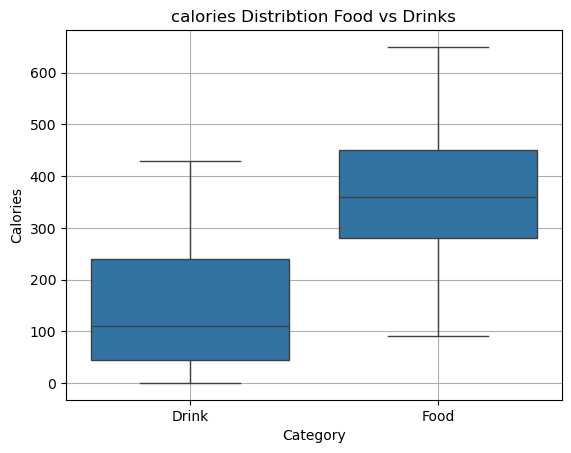

In [131]:
# Calories Food vs Drinks
sns.boxplot(data=sb_cleaned_menu, x='Category', y='Calories')
plt.title('calories Distribtion Food vs Drinks')
plt.grid(True)


#### Insight
- Food has higher calorific variability
- Drinks have average of 100 calorific value
- Minimum of drinks rival the food in calorie content

In [133]:
# Identifying top 10 high cal items
high_cal_items = sb_cleaned_menu[sb_cleaned_menu['Calories'] > 500].head(10)
high_cal_items

,Items,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g),Sodium,Category
231,Strawberries & Jam Sandwich,600,25.0,80,10,19,NaN,Food
238,Green Goddess Avocado Salad,620,37.0,62,10,13,NaN,Food
242,Roasted Turkey & Dill Havarti Sandwich,600,32.0,47,6,32,NaN,Food
243,Seared Steak & Cheddar Sandwich,530,29.0,44,2,23,NaN,Food
246,Turkey & Fire-Roasted Corn Salad,560,29.0,53,7,24,NaN,Food
247,Za'atar Chicken & Lemon Tahini Salad,570,23.0,67,11,27,NaN,Food
252,PB&J Protein Box,520,26.0,53,5,20,NaN,Food
274,Chicken Artichoke on Ancient Grain Flatbread,510,27.0,37,5,24,NaN,Food
279,Lentils & Vegetable Protein Bowl with Brown Rice,650,29.0,80,21,23,NaN,Food
282,Turkey Pesto Panini,560,23.0,55,3,34,NaN,Food


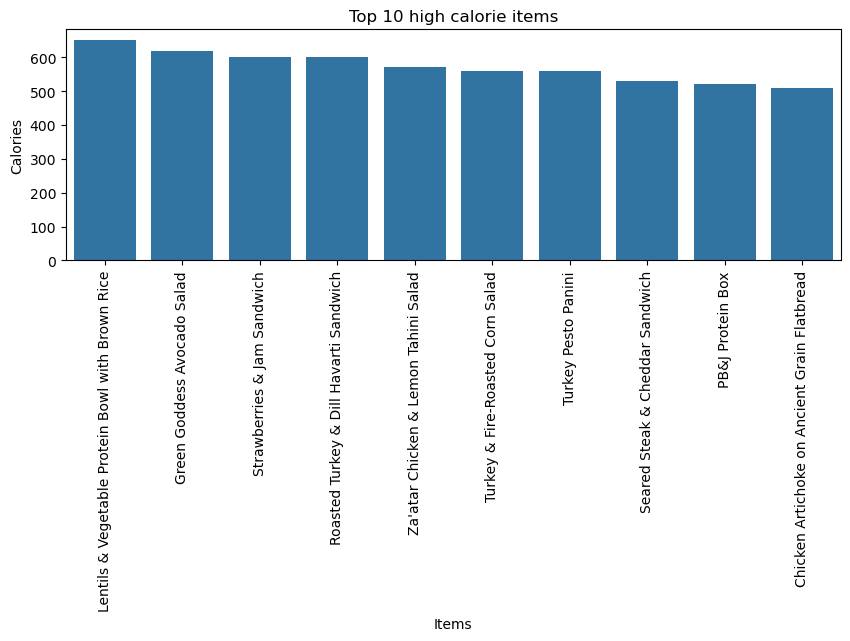

In [135]:
# Plotting the top 10 high calories items
plt.figure(figsize = (10,3))
sns.barplot(data=high_cal_items.sort_values('Calories', ascending=False), x='Items' , y='Calories', )
plt.title('Top 10 high calorie items')
plt.xticks(rotation=90)
plt.show()

In [ ]:
- High calories item in the menu are foods.
- The top ten high calories item all are foods.

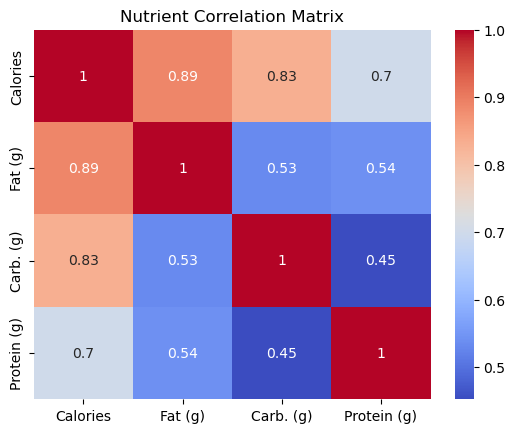

In [137]:
# Nutrient composition analysis 
# Examine the correlation between different nutrients
correlation_matrix = sb_cleaned_menu[['Calories', 'Fat (g)', 'Carb. (g)', 'Protein (g)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Nutrient Correlation Matrix')
plt.show()

- Carbohydrates and protein has lower correlation rate.
- Fat and calories has higher correlation rate.

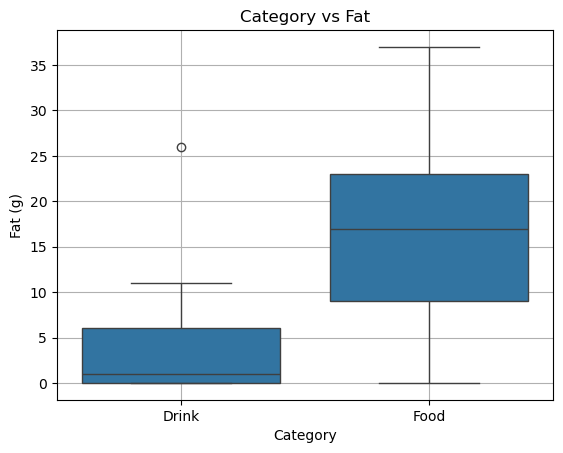

In [139]:
# Category vs Fat
sns.boxplot(data=sb_cleaned_menu, x='Category', y='Fat (g)')
plt.title('Category vs Fat')
plt.grid(True)
plt.show()

- In here food clearly dominate the drink in fat content.

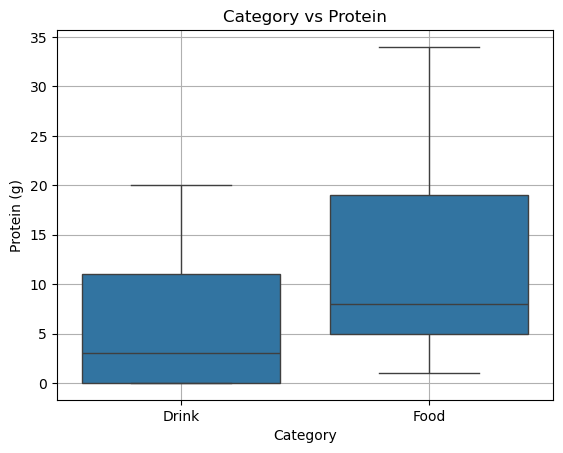

In [141]:
# Category vs protein
sns.boxplot(data=sb_cleaned_menu, x='Category', y='Protein (g)')
plt.title('Category vs Protein')
plt.grid(True)
plt.show()

- It clearly show the food has higher in protein and there is some outlier drinks that have higher protein content.

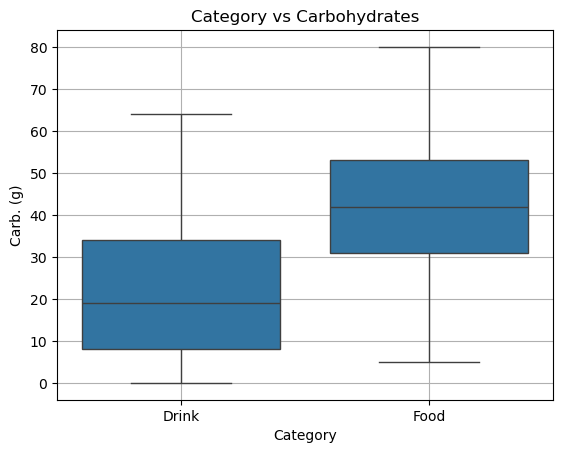

In [143]:
# Category vs Carb
sns.boxplot(data=sb_cleaned_menu, x='Category', y='Carb. (g)')
plt.title('Category vs Carbohydrates')
plt.grid(True)
plt.show()

- The carbohydrates content are higher in foods then drinks. But some drink rivial the food in carbohydrates content.

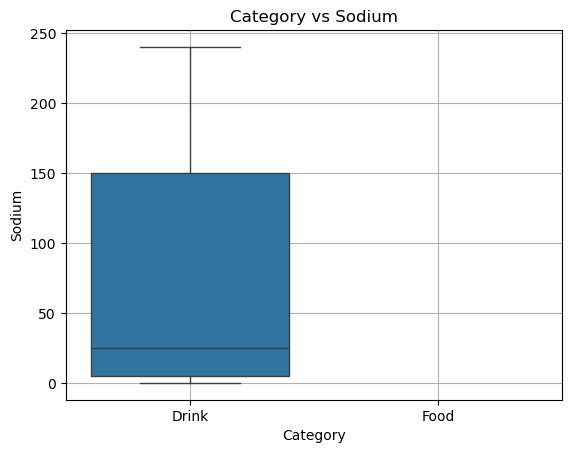

In [145]:
# Category vs sodium
sns.boxplot(data=sb_cleaned_menu, x='Category', y='Sodium')
plt.title('Category vs Sodium')
plt.grid(True)
plt.show()

- Sodium content are only present in Drinks

### 📊 Key Insights from Starbucks Menu Analysis:

High Protein and Carbohydrates in Food:

- Starbucks food items tend to be rich in both protein and carbohydrates.

Greater Caloric Variability in Food:

- Food items show a wide range in calorie content, indicating diverse nutritional profiles.

Drinks Average ~100 Calories:

- Most beverages have a relatively low average caloric value, around 100 calories.

Few Drinks Match Food in Calories:

- Only a small number of beverages have calorie levels comparable to food items.

Carbohydrate Content in Drinks Comparable to Food:

- Many beverages, especially sugary ones, contain carbohydrate levels similar to those found in solid food items.

Sodium Found Exclusively in Drinks:

- Interestingly, sodium appears to be present only in drinks, not in food items.



### Conclusion 
- The analysis of the Starbucks menu reveals distinct nutritional trends between food and beverages. Food items are generally higher in protein, carbohydrates, and exhibit a wide range in caloric content, reflecting their role as more substantial meal components. In contrast, drinks typically have lower calories on average, though some rival food in carbohydrate levels. The unexpected presence of sodium exclusively in drinks highlights the importance of examining beverages closely when considering overall dietary intake. These insights can guide more informed choices for customers seeking to balance taste with nutrition.